<a href="https://colab.research.google.com/github/8johan/devoir/blob/main/minig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sys 


In [4]:
fname = '/content/splice (1).data'
with open(fname) as f:
    content = f.readlines()
content = [x.strip().split(',') for x in content]
for l in content:
    for i in range(len(l)):
        l[i] = l[i].strip()
raw_data = np.array(content)

In [5]:
raw_data

array([['EI', 'ATRINS-DONOR-521',
        'CCAGCTGCATCACAGGAGGCCAGCGAGCAGGTCTGTTCCAAGGGCCTTCGAGCCAGTCTG'],
       ['EI', 'ATRINS-DONOR-905',
        'AGACCCGCCGGGAGGCGGAGGACCTGCAGGGTGAGCCCCACCGCCCCTCCGTGCCCCCGC'],
       ['EI', 'BABAPOE-DONOR-30',
        'GAGGTGAAGGACGTCCTTCCCCAGGAGCCGGTGAGAAGCGCAGTCGGGGGCACGGGGATG'],
       ...,
       ['N', 'ORARGIT-NEG-241',
        'TCTCGGGGGCGGCCGGCGCGGCGGGGAGCGGTCCCCGGCCGCGGCCCCGACGTGTGTGTC'],
       ['N', 'TARHBB-NEG-541',
        'ATTCTACTTAGTAAACATAATTTCTTGTGCTAGATAACCAAATTAAGAAAACCAAAACAA'],
       ['N', 'TARHBD-NEG-1981',
        'AGGCTGCCTATCAGAAGGTGGTGGCTGGTGTGGCTGCTGCTCTGGCTCACAAGTACCATT']],
      dtype='<U60')

In [6]:
 column_names=['type', 'Donor', 'seq ']
x = pd.DataFrame(raw_data,columns = column_names)
x.head()

,type,Donor,seq
0,EI,ATRINS-DONOR-521,CCAGCTGCATCACAGGAGGCCAGCGAGCAGGTCTGTTCCAAGGGCC...
1,EI,ATRINS-DONOR-905,AGACCCGCCGGGAGGCGGAGGACCTGCAGGGTGAGCCCCACCGCCC...
2,EI,BABAPOE-DONOR-30,GAGGTGAAGGACGTCCTTCCCCAGGAGCCGGTGAGAAGCGCAGTCG...
3,EI,BABAPOE-DONOR-867,GGGCTGCGTTGCTGGTCACATTCCTGGCAGGTATGGGGCGGGGCTT...
4,EI,BABAPOE-DONOR-2817,GCTCAGCCCCCAGGTCACCCAGGAACTGACGTGAGTGTCCCCATCC...


In [7]:
import re
def string_to_array(seq_string):
   seq_string = seq_string.lower()
   seq_string = re.sub('[^acgt]', 'z', seq_string)
   seq_string = np.array(list(seq_string))
   return seq_string
# create a label encoder with 'acgtn' alphabet
from sklearn.preprocessing import LabelEncoder



In [8]:
def ordinal_encoder(my_array):
   label_encoder = LabelEncoder()
   label_encoder.fit(np.array(['a','c','g','t','z']))
   integer_encoded = label_encoder.transform(my_array)
   float_encoded = integer_encoded.astype(float)
   float_encoded[float_encoded == 0] = 0.25 # A
   float_encoded[float_encoded == 1] = 0.25 # C
   float_encoded[float_encoded == 2] =0.75 # G
   float_encoded[float_encoded == 3] = 1 # T
   float_encoded[float_encoded == 4] = 0.00 # anything else, lets say n
   

   return float_encoded

In [9]:
l=[]
for i in range(3190):
  o=raw_data[i][2]
  u=ordinal_encoder(string_to_array(raw_data[i][2]))
  l.append(u)

In [19]:
u = pd.DataFrame(l)
r = pd.concat([x, u], axis=1)
r

,type,Donor,seq,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,EI,ATRINS-DONOR-521,CCAGCTGCATCACAGGAGGCCAGCGAGCAGGTCTGTTCCAAGGGCC...,0.25,0.25,0.25,0.75,0.25,1.00,0.75,0.25,0.25,1.00,0.25,0.25,0.25,0.25,0.75,0.75,0.25,0.75,0.75,0.25,0.25,0.25,0.75,0.25,0.75,0.25,0.75,0.25,0.25,0.75,0.75,1.00,0.25,1.00,0.75,1.00,1.00,0.25,0.25,0.25,0.25,0.75,0.75,0.75,0.25,0.25,1.00,1.00,0.25,0.75,0.25,0.75,0.25,0.25,0.25,0.75,1.00,0.25,1.00,0.75
1,EI,ATRINS-DONOR-905,AGACCCGCCGGGAGGCGGAGGACCTGCAGGGTGAGCCCCACCGCCC...,0.25,0.75,0.25,0.25,0.25,0.25,0.75,0.25,0.25,0.75,0.75,0.75,0.25,0.75,0.75,0.25,0.75,0.75,0.25,0.75,0.75,0.25,0.25,0.25,1.00,0.75,0.25,0.25,0.75,0.75,0.75,1.00,0.75,0.25,0.75,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.75,0.25,0.25,0.25,0.25,1.00,0.25,0.25,0.75,1.00,0.75,0.25,0.25,0.25,0.25,0.25,0.75,0.25
2,EI,BABAPOE-DONOR-30,GAGGTGAAGGACGTCCTTCCCCAGGAGCCGGTGAGAAGCGCAGTCG...,0.75,0.25,0.75,0.75,1.00,0.75,0.25,0.25,0.75,0.75,0.25,0.25,0.75,1.00,0.25,0.25,1.00,1.00,0.25,0.25,0.25,0.25,0.25,0.75,0.75,0.25,0.75,0.25,0.25,0.75,0.75,1.00,0.75,0.25,0.75,0.25,0.25,0.75,0.25,0.75,0.25,0.25,0.75,1.00,0.25,0.75,0.75,0.75,0.75,0.75,0.25,0.25,0.25,0.75,0.75,0.75,0.75,0.25,1.00,0.75
3,EI,BABAPOE-DONOR-867,GGGCTGCGTTGCTGGTCACATTCCTGGCAGGTATGGGGCGGGGCTT...,0.75,0.75,0.75,0.25,1.00,0.75,0.25,0.75,1.00,1.00,0.75,0.25,1.00,0.75,0.75,1.00,0.25,0.25,0.25,0.25,1.00,1.00,0.25,0.25,1.00,0.75,0.75,0.25,0.25,0.75,0.75,1.00,0.25,1.00,0.75,0.75,0.75,0.75,0.25,0.75,0.75,0.75,0.75,0.25,1.00,1.00,0.75,0.25,1.00,0.25,0.75,0.75,1.00,1.00,1.00,1.00,0.25,0.25,0.25,0.25
4,EI,BABAPOE-DONOR-2817,GCTCAGCCCCCAGGTCACCCAGGAACTGACGTGAGTGTCCCCATCC...,0.75,0.25,1.00,0.25,0.25,0.75,0.25,0.25,0.25,0.25,0.25,0.25,0.75,0.75,1.00,0.25,0.25,0.25,0.25,0.25,0.25,0.75,0.75,0.25,0.25,0.25,1.00,0.75,0.25,0.25,0.75,1.00,0.75,0.25,0.75,1.00,0.75,1.00,0.25,0.25,0.25,0.25,0.25,1.00,0.25,0.25,0.25,0.75,0.75,0.25,0.25,0.25,1.00,1.00,0.75,0.25,0.25,0.25,0.25,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3185,N,ORAHBPSBD-NEG-2881,TCTCTTCCCTTCCCCTCTCTCTTTCTTTCTTTTCTCTCCTCTTCTC...,1.00,0.25,1.00,0.25,1.00,1.00,0.25,0.25,0.25,1.00,1.00,0.25,0.25,0.25,0.25,1.00,0.25,1.00,0.25,1.00,0.25,1.00,1.00,1.00,0.25,1.00,1.00,1.00,0.25,1.00,1.00,1.00,1.00,0.25,1.00,0.25,1.00,0.25,0.25,1.00,0.25,1.00,1.00,0.25,1.00,0.25,1.00,1.00,0.25,1.00,1.00,1.00,0.25,0.25,1.00,0.25,1.00,0.25,1.00,1.00
3186,N,ORAINVOL-NEG-2161,GAGCTCCCAGAGCAGCAAGAGGGCCAGCTGAAGCACCTGGAGAAGC...,0.75,0.25,0.75,0.25,1.00,0.25,0.25,0.25,0.25,0.75,0.25,0.75,0.25,0.25,0.75,0.25,0.25,0.25,0.75,0.25,0.75,0.75,0.75,0.25,0.25,0.25,0.75,0.25,1.00,0.75,0.25,0.25,0.75,0.25,0.25,0.25,0.25,1.00,0.75,0.75,0.25,0.75,0.25,0.25,0.75,0.25,0.25,0.75,0.75,0.25,0.75,0.75,0.25,0.25,0.25,0.25,0.75,0.25,1.00,0.75
3187,N,ORARGIT-NEG-241,TCTCGGGGGCGGCCGGCGCGGCGGGGAGCGGTCCCCGGCCGCGGCC...,1.00,0.25,1.00,0.25,0.75,0.75,0.75,0.75,0.75,0.25,0.75,0.75,0.25,0.25,0.75,0.75,0.25,0.75,0.25,0.75,0.75,0.25,0.75,0.75,0.75,0.75,0.25,0.75,0.25,0.75,0.75,1.00,0.25,0.25,0.25,0.25,0.75,0.75,0.25,0.25,0.75,0.25,0.75,0.75,0.25,0.25,0.25,0.25,0.75,0.25,0.25,0.75,1.00,0.75,1.00,0.75,1.00,0.75,1.00,0.25
3188,N,TARHBB-NEG-541,ATTCTACTTAGTAAACATAATTTCTTGTGCTAGATAACCAAATTAA...,0.25,1.00,1.00,0.25,1.00,0.25,0.25,1.00,1.00,0.25,0.75,1.00,0.25,0.25,0.25,0.25,0.25,1.00,0.25,0.25,1.00,1.00,1.00,0.25,1.00,1.00,0.75,1.00,0.75,0.25,1.00,0.25,0.75,0.25,1.00,0.25,0.25,0.25,0.25,0.25,0.25,0.25,1.00,1.00,0.25,0.25,0.75,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25


In [20]:
r['type']=r['type'].map({'N':0,'EI':1,'IE':2},na_action=None)

In [25]:
r

,type,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,1,0.25,0.25,0.25,0.75,0.25,1.00,0.75,0.25,0.25,1.00,0.25,0.25,0.25,0.25,0.75,0.75,0.25,0.75,0.75,0.25,0.25,0.25,0.75,0.25,0.75,0.25,0.75,0.25,0.25,0.75,0.75,1.00,0.25,1.00,0.75,1.00,1.00,0.25,0.25,0.25,0.25,0.75,0.75,0.75,0.25,0.25,1.00,1.00,0.25,0.75,0.25,0.75,0.25,0.25,0.25,0.75,1.00,0.25,1.00,0.75
1,1,0.25,0.75,0.25,0.25,0.25,0.25,0.75,0.25,0.25,0.75,0.75,0.75,0.25,0.75,0.75,0.25,0.75,0.75,0.25,0.75,0.75,0.25,0.25,0.25,1.00,0.75,0.25,0.25,0.75,0.75,0.75,1.00,0.75,0.25,0.75,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.75,0.25,0.25,0.25,0.25,1.00,0.25,0.25,0.75,1.00,0.75,0.25,0.25,0.25,0.25,0.25,0.75,0.25
2,1,0.75,0.25,0.75,0.75,1.00,0.75,0.25,0.25,0.75,0.75,0.25,0.25,0.75,1.00,0.25,0.25,1.00,1.00,0.25,0.25,0.25,0.25,0.25,0.75,0.75,0.25,0.75,0.25,0.25,0.75,0.75,1.00,0.75,0.25,0.75,0.25,0.25,0.75,0.25,0.75,0.25,0.25,0.75,1.00,0.25,0.75,0.75,0.75,0.75,0.75,0.25,0.25,0.25,0.75,0.75,0.75,0.75,0.25,1.00,0.75
3,1,0.75,0.75,0.75,0.25,1.00,0.75,0.25,0.75,1.00,1.00,0.75,0.25,1.00,0.75,0.75,1.00,0.25,0.25,0.25,0.25,1.00,1.00,0.25,0.25,1.00,0.75,0.75,0.25,0.25,0.75,0.75,1.00,0.25,1.00,0.75,0.75,0.75,0.75,0.25,0.75,0.75,0.75,0.75,0.25,1.00,1.00,0.75,0.25,1.00,0.25,0.75,0.75,1.00,1.00,1.00,1.00,0.25,0.25,0.25,0.25
4,1,0.75,0.25,1.00,0.25,0.25,0.75,0.25,0.25,0.25,0.25,0.25,0.25,0.75,0.75,1.00,0.25,0.25,0.25,0.25,0.25,0.25,0.75,0.75,0.25,0.25,0.25,1.00,0.75,0.25,0.25,0.75,1.00,0.75,0.25,0.75,1.00,0.75,1.00,0.25,0.25,0.25,0.25,0.25,1.00,0.25,0.25,0.25,0.75,0.75,0.25,0.25,0.25,1.00,1.00,0.75,0.25,0.25,0.25,0.25,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3185,0,1.00,0.25,1.00,0.25,1.00,1.00,0.25,0.25,0.25,1.00,1.00,0.25,0.25,0.25,0.25,1.00,0.25,1.00,0.25,1.00,0.25,1.00,1.00,1.00,0.25,1.00,1.00,1.00,0.25,1.00,1.00,1.00,1.00,0.25,1.00,0.25,1.00,0.25,0.25,1.00,0.25,1.00,1.00,0.25,1.00,0.25,1.00,1.00,0.25,1.00,1.00,1.00,0.25,0.25,1.00,0.25,1.00,0.25,1.00,1.00
3186,0,0.75,0.25,0.75,0.25,1.00,0.25,0.25,0.25,0.25,0.75,0.25,0.75,0.25,0.25,0.75,0.25,0.25,0.25,0.75,0.25,0.75,0.75,0.75,0.25,0.25,0.25,0.75,0.25,1.00,0.75,0.25,0.25,0.75,0.25,0.25,0.25,0.25,1.00,0.75,0.75,0.25,0.75,0.25,0.25,0.75,0.25,0.25,0.75,0.75,0.25,0.75,0.75,0.25,0.25,0.25,0.25,0.75,0.25,1.00,0.75
3187,0,1.00,0.25,1.00,0.25,0.75,0.75,0.75,0.75,0.75,0.25,0.75,0.75,0.25,0.25,0.75,0.75,0.25,0.75,0.25,0.75,0.75,0.25,0.75,0.75,0.75,0.75,0.25,0.75,0.25,0.75,0.75,1.00,0.25,0.25,0.25,0.25,0.75,0.75,0.25,0.25,0.75,0.25,0.75,0.75,0.25,0.25,0.25,0.25,0.75,0.25,0.25,0.75,1.00,0.75,1.00,0.75,1.00,0.75,1.00,0.25
3188,0,0.25,1.00,1.00,0.25,1.00,0.25,0.25,1.00,1.00,0.25,0.75,1.00,0.25,0.25,0.25,0.25,0.25,1.00,0.25,0.25,1.00,1.00,1.00,0.25,1.00,1.00,0.75,1.00,0.75,0.25,1.00,0.25,0.75,0.25,1.00,0.25,0.25,0.25,0.25,0.25,0.25,0.25,1.00,1.00,0.25,0.25,0.75,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25


In [26]:

o=r
o=o.drop('type',axis=1)

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(o)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])

In [68]:
final=pd.concat([principalDf,r['type'] ], axis=1)

In [69]:
final

,PC1,PC2,type
0,0.181097,-0.486389,1
1,0.646207,-0.081794,1
2,-0.152568,-0.522196,1
3,-0.803566,-0.150457,1
4,0.658363,-0.704087,1
...,...,...,...
3185,-0.849828,-0.502038,0
3186,0.572696,0.316545,0
3187,-0.241630,-0.178083,0
3188,0.297472,0.484498,0


In [44]:
final['type']=final['type'].map({1:'EI',0:'N',2:'IE'},na_action=None)

In [50]:
final['type']=='N'

0       False
1       False
2       False
3       False
4       False
        ...  
3185     True
3186     True
3187     True
3188     True
3189     True
Name: type, Length: 3190, dtype: bool

In [49]:
for target, color in zip(targets,colors):
  print(target)

N
EI
IE


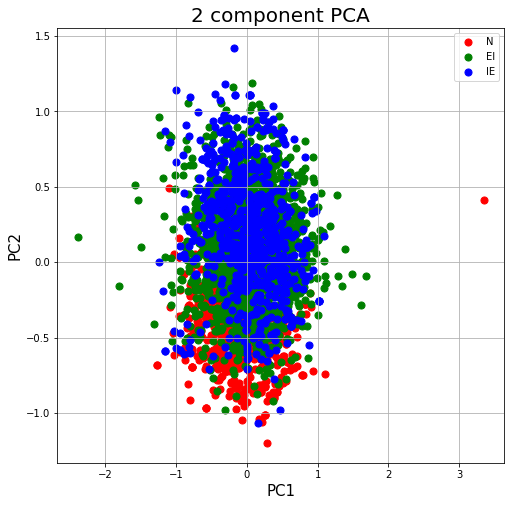

In [51]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['N', 'EI', 'IE']
colors = ['r', 'g', 'b']

indicesToKeep1 = final['type'] == 'EI'
indicesToKeep2 = final['type'] == 'N'
indicesToKeep3 = final['type'] == 'IE'

ax.scatter(final.loc[indicesToKeep1, 'PC1'], final.loc[indicesToKeep1, 'PC2'], c = 'r', s = 50)
ax.scatter(final.loc[indicesToKeep2, 'PC1'], final.loc[indicesToKeep2, 'PC2'], c = 'g', s = 50)
ax.scatter(final.loc[indicesToKeep3, 'PC1'], final.loc[indicesToKeep3, 'PC2'], c = 'b', s = 50)
ax.legend(targets)
ax.grid()

In [66]:
final['type']=final['type'].map({'EI':1,'N':0,'IE':2},na_action=None)

In [67]:
final

,PC1,PC2,type
0,0.181097,-0.486389,NaN
1,0.646207,-0.081794,NaN
2,-0.152568,-0.522196,NaN
3,-0.803566,-0.150457,NaN
4,0.658363,-0.704087,NaN
...,...,...,...
3185,-0.849828,-0.502038,NaN
3186,0.572696,0.316545,NaN
3187,-0.241630,-0.178083,NaN
3188,0.297472,0.484498,NaN


In [57]:
y=np.c_[final["type"]]
x=np.c_[final['PC1'],final['PC2']]


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size = 0.3, random_state = 1)

In [61]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: ignored

In [30]:
from sklearn.neighbors import KNeighborsClassifier
KNNclassifier = KNeighborsClassifier(n_neighbors=5)
KNNclassifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
new_x=f.head(100)
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(new_x)
wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [31]:

import numpy as np
import matplotlib.pyplot as plt


from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA

In [32]:
shuffle_index_train = np.random.permutation(len(X_train))
shuffle_index_test=np.random.permutation(len(X_test))

In [34]:
kstk=

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
1197,0.25,0.25,0.25,0.25,0.25,1.00,0.75,0.25,1.00,1.00,0.75,1.00,0.25,1.00,1.00,1.00,0.25,0.25,1.00,1.00,1.00,0.25,0.25,1.00,0.25,1.00,0.25,0.25,0.25,0.75,0.25,0.25,1.00,0.25,1.00,0.75,0.25,0.75,0.75,0.25,1.00,1.00,0.25,0.25,1.00,0.75,1.00,1.00,0.25,0.25,1.00,0.75,1.00,0.25,0.25,0.25,1.00,0.25,0.25,0.25
1777,1.00,0.25,1.00,0.25,0.75,0.25,0.25,1.00,0.25,0.25,1.00,0.75,0.25,1.00,1.00,1.00,1.00,0.25,1.00,0.25,0.25,0.25,0.25,0.75,0.25,0.25,1.00,0.25,1.00,1.00,1.00,0.75,0.25,1.00,1.00,1.00,0.25,1.00,0.25,1.00,0.75,1.00,1.00,0.75,0.25,1.00,0.25,0.25,0.75,1.00,0.25,0.75,0.25,0.25,0.25,1.00,0.25,1.00,0.75,1.00
510,0.75,0.75,0.25,1.00,0.75,0.25,0.25,0.75,0.75,0.25,0.75,0.25,0.25,0.25,0.25,1.00,0.25,0.25,0.25,0.25,0.25,1.00,0.75,0.25,0.75,0.25,1.00,0.75,0.75,0.75,0.75,1.00,0.25,0.25,0.75,0.75,0.25,0.75,0.75,0.75,0.75,0.75,0.25,1.00,0.75,0.25,0.75,0.75,0.75,0.75,1.00,0.75,0.25,1.00,0.75,1.00,0.75,1.00,0.25,1.00
1045,0.25,0.25,1.00,0.75,0.25,0.25,1.00,0.25,1.00,0.25,0.25,0.75,0.25,0.25,1.00,0.75,0.75,0.25,1.00,0.25,1.00,0.25,1.00,0.75,1.00,1.00,0.25,1.00,0.25,0.75,0.25,0.25,1.00,0.75,1.00,0.25,0.25,1.00,0.75,0.25,0.25,1.00,0.75,0.75,0.25,1.00,0.75,1.00,0.75,0.75,0.25,1.00,1.00,0.25,1.00,0.25,0.25,1.00,0.75,1.00
2236,0.75,1.00,0.75,0.25,0.75,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.75,0.25,0.25,0.25,0.25,0.25,0.75,0.25,0.25,0.25,0.25,1.00,0.75,1.00,1.00,1.00,0.25,0.25,0.25,1.00,0.75,0.75,0.25,1.00,0.25,0.25,1.00,1.00,0.25,0.25,0.25,0.25,0.25,0.75,0.25,1.00,1.00,1.00,1.00,1.00,0.75,1.00,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,0.75,0.75,0.25,1.00,0.75,0.25,0.75,0.75,0.25,0.25,0.75,0.75,0.25,0.75,0.25,0.25,1.00,0.25,0.25,0.25,1.00,1.00,0.75,0.25,0.25,0.25,0.25,1.00,0.75,0.75,0.75,0.25,0.75,0.75,0.25,0.75,0.75,0.25,0.75,0.75,1.00,1.00,0.75,0.25,0.25,0.25,1.00,0.75,0.25,0.75,0.25,1.00,0.75,0.25,0.75,0.25,1.00,0.25,0.75,0.25
905,0.25,1.00,1.00,1.00,1.00,0.75,0.25,0.25,0.25,0.25,0.25,0.25,1.00,0.75,0.25,0.25,0.25,0.25,1.00,0.25,1.00,1.00,0.25,0.25,1.00,0.75,0.75,0.25,0.25,0.75,0.75,0.25,0.25,0.25,0.25,0.75,0.25,0.25,0.25,0.25,0.25,0.75,0.25,0.25,0.25,0.25,0.75,0.75,0.75,0.75,0.25,0.25,0.25,0.25,0.25,0.25,0.75,0.25,0.25,0.75
1096,0.75,0.75,0.25,0.25,1.00,0.25,1.00,0.25,0.25,1.00,1.00,0.25,1.00,0.25,1.00,1.00,0.25,0.25,1.00,1.00,0.25,0.25,0.25,1.00,1.00,1.00,0.75,0.25,0.25,0.75,0.25,0.75,0.75,0.25,1.00,0.75,0.75,0.25,0.25,0.75,0.25,1.00,0.75,0.75,0.25,0.25,0.75,0.25,0.25,0.25,0.25,0.25,0.75,0.75,0.25,0.25,1.00,0.75,0.75,0.75
235,0.75,0.25,0.25,0.75,1.00,0.25,0.25,1.00,0.25,1.00,0.25,0.25,0.75,0.25,0.25,0.25,1.00,0.75,1.00,1.00,1.00,0.75,0.25,0.25,0.25,1.00,0.25,0.25,0.25,0.75,0.75,1.00,0.25,0.25,0.75,0.25,1.00,0.75,0.25,1.00,1.00,0.25,1.00,0.25,1.00,0.25,1.00,0.75,0.25,0.25,0.25,1.00,0.25,0.75,0.25,1.00,1.00,1.00,0.25,0.25
